In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
import numpy as np

In [3]:
np.column_stack(([1,2,3],[4,5,6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

In [4]:
fish_data = np.column_stack((fish_length,fish_weight))
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [5]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [6]:
#train set과 test set을 자동으로 나누어주는
from sklearn.model_selection import train_test_split
train_input, test_input, train_target,test_target = train_test_split(fish_data, fish_target, random_state =42)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [8]:
print(kn.predict([[25,150]]))

[0.]


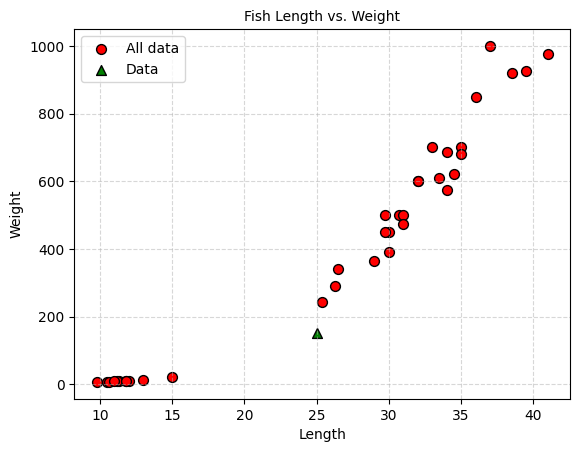

In [9]:
import matplotlib.pyplot as plt
# 산점도 그리기
plt.scatter(train_input[:,0], train_input[:,1], label='All data', color='r', marker='o', edgecolors=(0, 0, 0), s= 50)
plt.scatter(25, 150, label='Data', color='green', marker='^', edgecolors=(0, 0, 0), s =50)

# 축 레이블 설정
plt.xlabel('Length')
plt.ylabel('Weight')

# 제목 설정
plt.title('Fish Length vs. Weight', fontsize=10)

# 그리드 표시
plt.grid(True, linestyle='--', alpha=0.5)


plt.legend()

# 그래프 출력
plt.show()

In [10]:
distances, indexes = kn.kneighbors([[25,150]])
print(distances, indexes)

[[ 92.00086956 130.48375378 138.32150953 140.00603558 140.62090883]] [[12 29  5 19  4]]


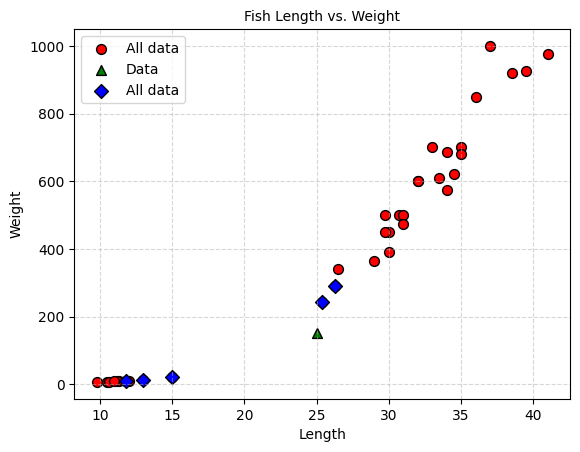

In [11]:
# 산점도 그리기
plt.scatter(train_input[:,0], train_input[:,1], label='All data', color='r', marker='o', edgecolors=(0, 0, 0), s= 50)
plt.scatter(25, 150, label='Data', color='green', marker='^', edgecolors=(0, 0, 0), s =50)
plt.scatter(train_input[indexes,0], train_input[indexes,1], label='All data', color='b', marker='D', edgecolors=(0, 0, 0), s= 50)

# 축 레이블 설정
plt.xlabel('Length')
plt.ylabel('Weight')

# 제목 설정
plt.title('Fish Length vs. Weight', fontsize=10)

# 그리드 표시
plt.grid(True, linestyle='--', alpha=0.5)


plt.legend()

# 그래프 출력
plt.show()

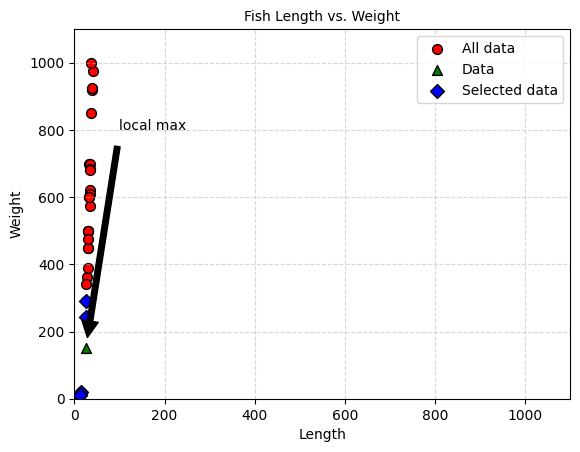

In [12]:
import matplotlib.pyplot as plt

# 산점도 그리기
fig, ax = plt.subplots()
ax.scatter(train_input[:, 0], train_input[:, 1], label='All data', color='r', marker='o', edgecolors=(0, 0, 0), s=50)
ax.scatter(25, 150, label='Data', color='green', marker='^', edgecolors=(0, 0, 0), s=50)
ax.scatter(train_input[indexes, 0], train_input[indexes, 1], label='Selected data', color='b', marker='D', edgecolors=(0, 0, 0), s=50)

# 축 범위 설정
ax.set_xlim(0, 1100)
ax.set_ylim(0, 1100)

# 축 레이블 설정
ax.set_xlabel('Length')
ax.set_ylabel('Weight')

# 제목 설정
ax.set_title('Fish Length vs. Weight', fontsize=10)

# 그리드 표시
ax.grid(True, linestyle='--', alpha=0.5)

# 주석 추가
ax.annotate('local max', xy=(25, 150), xytext=(100, 800), arrowprops=dict(facecolor='black', shrink=0.05))

# 범례 표시
ax.legend()

# 그래프 출력
plt.show()


In [13]:
mean = np.mean(train_input, axis = 0)
std = np.std(train_input, axis = 0)
print(mean, std)

[ 26.175      418.08888889] [ 10.21073441 321.67847023]


In [14]:
train_scaled = (train_input - mean) /std

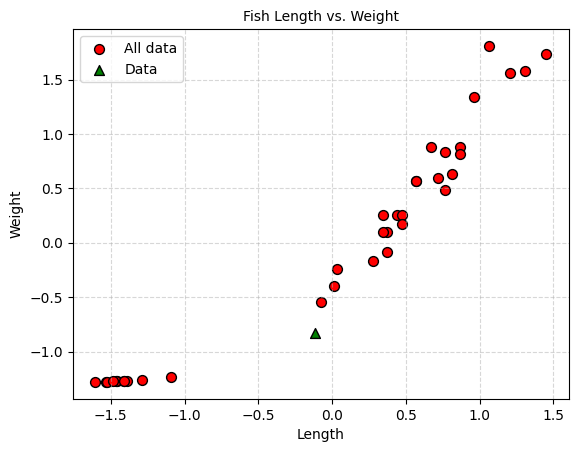

In [15]:
import matplotlib.pyplot as plt

new = ([25,150]- mean)/std

# 산점도 그리기
fig, ax = plt.subplots()
ax.scatter(train_scaled[:, 0], train_scaled[:, 1], label='All data', color='r', marker='o', edgecolors=(0, 0, 0), s=50)
ax.scatter(new[0], new[1], label='Data', color='green', marker='^', edgecolors=(0, 0, 0), s=50)


# 축 레이블 설정
ax.set_xlabel('Length')
ax.set_ylabel('Weight')

# 제목 설정
ax.set_title('Fish Length vs. Weight', fontsize=10)

# 그리드 표시
ax.grid(True, linestyle='--', alpha=0.5)

# 주석 추가
ax.annotate('local max', xy=(25, 150), xytext=(100, 800), arrowprops=dict(facecolor='black', shrink=0.05))

# 범례 표시
ax.legend()

# 그래프 출력
plt.show()


In [16]:
kn.fit(train_scaled, train_target)
test_scaled = (test_input - mean) / std
kn.score(test_scaled, test_target)

1.0

In [17]:
print(kn.predict([new]))

[1.]


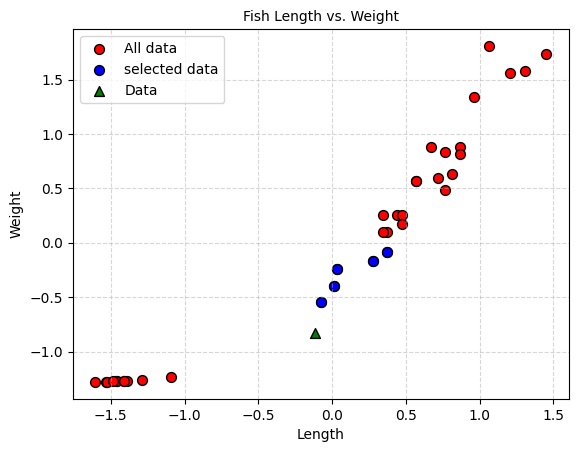

In [18]:
import matplotlib.pyplot as plt

new = ([25,150]- mean)/std
distances, indexes = kn.kneighbors([new])


# 산점도 그리기
fig, ax = plt.subplots()
ax.scatter(train_scaled[:, 0], train_scaled[:, 1], label='All data', color='r', marker='o', edgecolors=(0, 0, 0), s=50)
ax.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], label='selected data', color='b', marker='o', edgecolors=(0, 0, 0), s=50)
ax.scatter(new[0], new[1], label='Data', color='green', marker='^', edgecolors=(0, 0, 0), s=50)


# 축 레이블 설정
ax.set_xlabel('Length')
ax.set_ylabel('Weight')

# 제목 설정
ax.set_title('Fish Length vs. Weight', fontsize=10)

# 그리드 표시
ax.grid(True, linestyle='--', alpha=0.5)

# 주석 추가
ax.annotate('local max', xy=(25, 150), xytext=(100, 800), arrowprops=dict(facecolor='black', shrink=0.05))

# 범례 표시
ax.legend()

# 그래프 출력
plt.show()


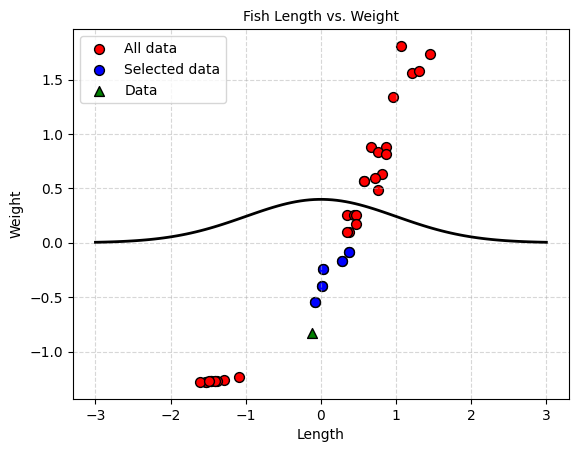

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# 정규분포의 평균과 표준편차
mu = np.mean(train_scaled, axis=0)
sigma = np.std(train_scaled, axis=0)

# 정규분포 그리기
x = np.linspace(mu[0] - 3 * sigma[0], mu[0] + 3 * sigma[0], 100)
y = np.exp(-(x - mu[0])**2 / (2 * sigma[0]**2)) / (sigma[0] * np.sqrt(2 * np.pi))

# 산점도 그리기
fig, ax = plt.subplots()
ax.scatter(train_scaled[:, 0], train_scaled[:, 1], label='All data', color='r', marker='o', edgecolors=(0, 0, 0), s=50)
ax.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], label='Selected data', color='b', marker='o', edgecolors=(0, 0, 0), s=50)
ax.scatter(new[0], new[1], label='Data', color='green', marker='^', edgecolors=(0, 0, 0), s=50)

# 정규분포 그래프 추가
ax.plot(x, y, color='k', linewidth=2)

# 축 레이블 설정
ax.set_xlabel('Length')
ax.set_ylabel('Weight')

# 제목 설정
ax.set_title('Fish Length vs. Weight', fontsize=10)

# 그리드 표시
ax.grid(True, linestyle='--', alpha=0.5)

# 주석 추가
ax.annotate('local max', xy=(25, 150), xytext=(100, 800), arrowprops=dict(facecolor='black', shrink=0.05))

# 범례 표시
ax.legend()

# 그래프 출력
plt.show()
